In [0]:
!pip -q install "dask[complete]"

In [0]:
!pip -q install graphviz 
!apt-get install graphviz -qq
!pip -q install pydot

In [0]:
import time
import numpy as np
import pandas as pd
import dask.array as da
import graphviz
import matplotlib.pyplot as plt


In [0]:
# Computing using Numpy Library
def numpy_calculation(size=(10, 10)):
  arr = np.random.random(size=size)
  return arr.mean()

#Computing using Dask Library
#Dividing into chunks when the number of elements are greater than 10000
def dask_calculation(size=(10, 10)):
  overhead_time_start = time.time()
  if size[0] > 10000: chunks = (1000, 1000)
  else: chunks = (int(size[0]/10), int(size[1]/10))
  data = da.random.random(size=size, chunks=chunks)
  overhead_time_end = time.time()
  print("Dask Overhead Time:",overhead_time_end-overhead_time_start)
  cal_start=time.time()
  y = data.mean()
  cal_end=time.time()
  ans=y.compute();
  print("Dask Calculation Time:",overhead_time_end-overhead_time_start)
  return ans;






In [0]:

import time

def dask_arr_chk():
  sizes = []
  times = []
  size = 10
  for i in range(5):
    dim1 = size ** (i+1)
    for j in range(5):
      dim2 = size ** (j+1)
      if dim1*dim2 in sizes: continue
      st = time.time()
      dask_calculation(size=(dim1, dim2))
      en = time.time()
      sizes.append(dim1*dim2)
      times.append(en-st)
  return sizes, times

def numpy_arr_chk():
  sizes = []
  times = []
  size = 10
  for i in range(5):
    dim1 = size ** (i+1)
    for j in range(4):
      dim2 = size ** (j+1)
      if dim1*dim2 in sizes: continue
      st = time.time()
      numpy_calculation(size=(dim1, dim2))
      en = time.time()
      sizes.append(dim1*dim2)
      times.append(en-st)
  return sizes, times

In [0]:
x1, y1 = numpy_arr_chk()

In [46]:
%%time
x2, y2 = dask_arr_chk()

CPU times: user 3min 4s, sys: 5.46 s, total: 3min 9s
Wall time: 51 s


In [47]:
x1

[100, 1000, 10000, 100000, 1000000, 10000000, 100000000, 1000000000]

In [48]:
y1

[0.00010776519775390625,
 0.0001976490020751953,
 0.0002510547637939453,
 0.0018432140350341797,
 0.01255488395690918,
 0.10556292533874512,
 1.0275638103485107,
 10.846405506134033]

In [49]:
x2

[100,
 1000,
 10000,
 100000,
 1000000,
 10000000,
 100000000,
 1000000000,
 10000000000]

In [50]:
y2

[0.11947178840637207,
 0.11375164985656738,
 0.1178436279296875,
 0.11760902404785156,
 0.12426209449768066,
 0.13851571083068848,
 0.45336103439331055,
 3.9827558994293213,
 45.793575048446655]

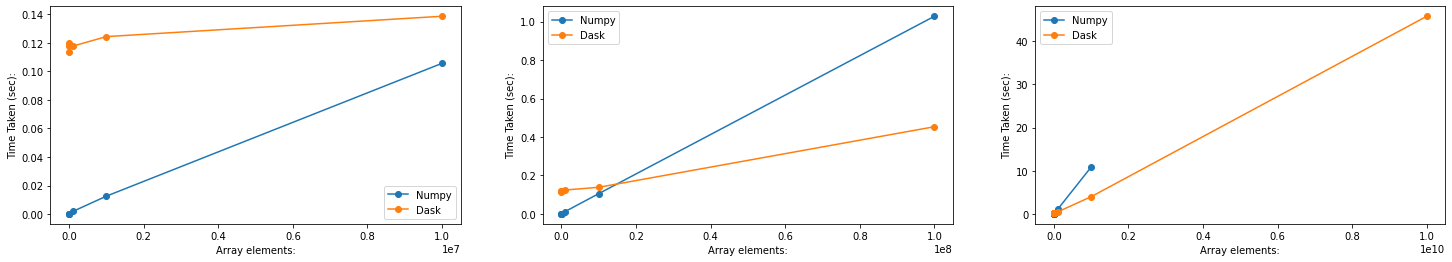

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(25, 4))
axs[0].plot(x1[:-2], y1[:-2], "o-", label="Numpy")
axs[0].plot(x2[:-3], y2[:-3], "o-", label="Dask")
axs[0].set_xlabel("Array elements:")
axs[0].set_ylabel("Time Taken (sec):")
axs[0].legend()

axs[1].plot(x1[:-1], y1[:-1], "o-", label="Numpy")
axs[1].plot(x2[:-2], y2[:-2], "o-", label="Dask")
axs[1].set_xlabel("Array elements:")
axs[1].set_ylabel("Time Taken (sec):")
axs[1].legend()

axs[2].plot(x1, y1, "o-", label="Numpy")
axs[2].plot(x2, y2, "o-", label="Dask")
axs[2].set_xlabel("Array elements:")
axs[2].set_ylabel("Time Taken (sec):")
axs[2].legend()



In [0]:
import dask.delayed as delay

@delay
def sq(x,y):
  print("sq method ",y)
  return x**2

@delay
def add(x, y, z):
  print("add method ",int(z))
  return x+y

@delay
def sum(arr):
  print("sum method complete")
  sum = 0
  for i in range(len(arr)): sum+=arr[i]
  return sum

In [0]:
#Adding the tasks to visualize the graph and the computation flow.

lst = list(np.arange(1, 11))

for i in range(3):
  temp = []
  if i == 0:
    for j in range(0, len(lst)):
      temp.append(sq(lst[j],j+1))
  elif i == 1:
    for j in range(0, len(lst)-1, 2):
      temp.append(add(lst[j], lst[j+1],j/2))
  else:
    temp.append(sum(lst))
  lst = temp
  
# New functions will be computed on last results


  
lst

[Delayed('sum-cc23e13e-8666-4290-8a17-fedbcdbec236')]

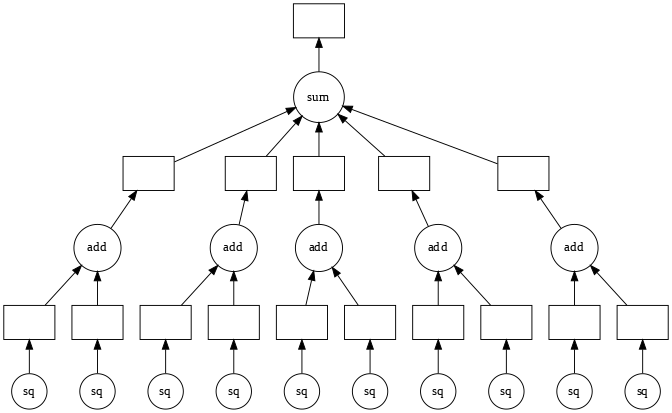

In [0]:
lst[0].visualize(size="7,10!")


In [0]:
lst[0].compute()

sq method  9
sq method  10
sq method  7
add method  4
sq method  8
sq method  3
add method  3
sq method  4
sq method  2
add method  1
sq method  1
sq method  5
add method  0
sq method  6
add method  2
sum method complete


385